In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.ticker as mtick

In [156]:
finanzas2 = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/trabajo_practico_1/tarea_del_nene/tarea_del_nene.csv", encoding= "latin-1")
finanzas2 = finanzas2.drop(columns = ["Employees", "Hqlocation", "Hqaddr", "Hqcity", "Hqstate", "Ceo", "Ceo-title", "Ticker", "Fullname", "Prftchange", "Revchange", "Address", "Website", "Hqzip", "Hqtel", "Assets", "Totshequity"])
finanzas2

,Rank,Title,Sector,Industry,Revenues,Profits
0,1,Walmart,Retailing,General Merchandisers,485873,13643.0
1,2,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),223604,24074.0
2,3,Apple,Technology,"Computers, Office Equipment",215639,45687.0
3,4,Exxon Mobil,Energy,Petroleum Refining,205004,7840.0
4,5,McKesson,Wholesalers,Wholesalers: Health Care,192487,2258.0
...,...,...,...,...,...,...
495,496,Michaels Cos.,Retailing,Specialty Retailers: Other,5197,378.2
496,497,Toll Brothers,Engineering & Construction,Homebuilders,5170,382.1
497,498,Yahoo,Technology,Internet Services and Retailing,5169,-214.3
498,499,Vistra Energy,Energy,Energy,5164,-214.3


___

# 2) ¿Cuál es el valor esperado o mediana de 'Revenues' de las empresas que están en la industria petrolera?


In [157]:
finanzas2['Revenues'][finanzas2['Industry'] == 'Petroleum Refining'].describe()

count        10.000000
mean      57460.900000
std       62266.696038
min        5414.000000
25%       11882.000000
50%       39931.500000
75%       71838.500000
max      205004.000000
Name: Revenues, dtype: float64

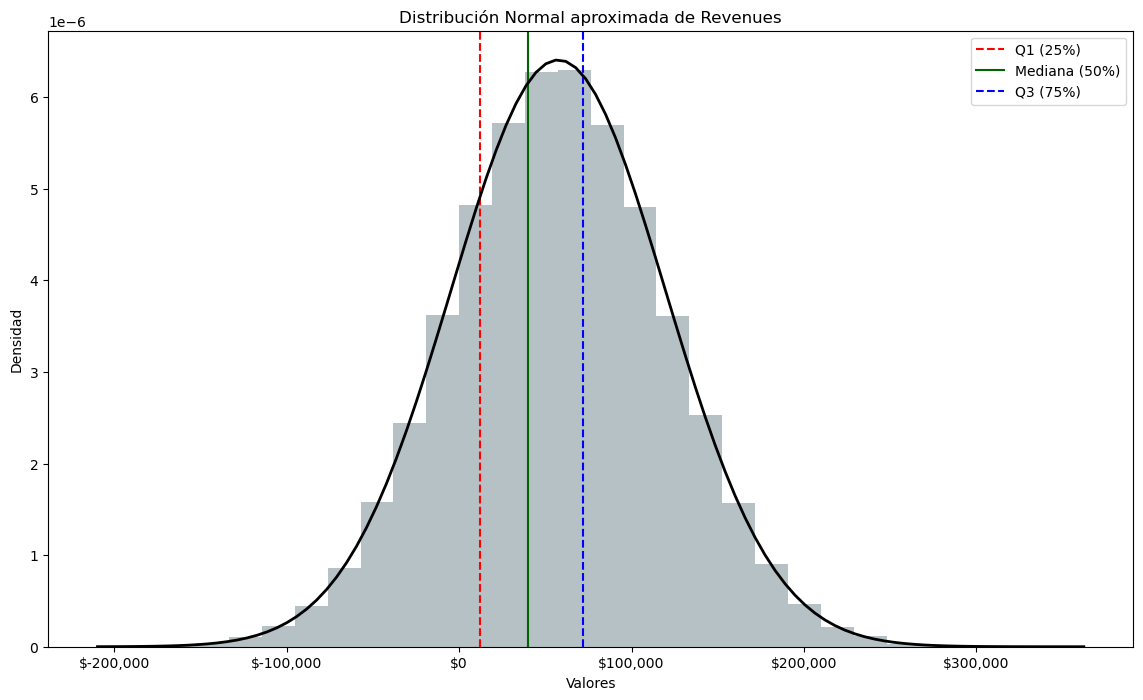

In [158]:
count = 10
mean = 57460.9
std = 62266.696038
min_value = 5414
q1 = 11882
median = 39931.5
q3 = 71838.5
max_value = 205004

# Genera datos basados en una distribución normal
data = np.random.normal(mean, std, 100000)

# Función para una campana de Gauss
def gauss(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Crea el gráfico de distribución
plt.figure(figsize=(14, 8))
plt.hist(data, bins=30, density=True, alpha=0.3, color='#0C343D')

# Añade líneas verticales para los cuartiles y valores extremos
plt.axvline(q1, color='red', linestyle='--', label='Q1 (25%)')
plt.axvline(median, color='darkgreen', linestyle='-', label='Mediana (50%)')
plt.axvline(q3, color='blue', linestyle='--', label='Q3 (75%)')

# Crea una campana de Gauss manualmente
x = np.linspace(min(data), max(data), 100)
gaussian_curve = gauss(x, mean, std)
plt.plot(x, gaussian_curve, 'k-', linewidth=2)

plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Distribución Normal aproximada de Revenues')
plt.legend()

plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.grid(False)
plt.show()

___

    ➢ Conclusiones:
    
    La mayoría de las empresas en la industria petrolera (el 50%) tienen ingresos por debajo de 39,931.50 millones de dólares. Esto indica que la mediana de ingresos en la industria petrolera se encuentra en este nivel, lo que sugiere que la mitad de las empresas tienen ingresos por debajo de este valor.
    
    La diferencia entre el primer cuartil (Q1) y el tercer cuartil (Q3), conocida como rango intercuartil (IQR), es una medida de la dispersión en la distribución de ingresos. En este caso, el IQR es grande (alrededor de 59,956.50), lo que sugiere que hay una amplia gama de ingresos entre las empresas petroleras.

___

    ➢ Con respecto a esta pregunta, pudimos notar 1 tipo de sesgo:

    1) Sesgo de tamaño (posibles outliers): Dado que el tercer cuartil (Q3) es considerablemente más alto que el primer cuartil (Q1), podría haber un sesgo hacia las empresas petroleras más grandes en el conjunto de datos. Esto podría deberse a que las empresas más pequeñas tienen menos visibilidad o no se incluyen en la lista.